## Electricity Consumption Trends In India: An Interactive EDA Study

<b>About: </b>
This project features an exploratory data analysis (EDA) on a 17-month time-series dataset covering electric energy consumption across 28 states in India during 2019 and 2020. I have utilized interactive visualizations, including sunburst charts, bar charts, line charts, and geo-spatial maps, to analyse and summarize state-wise, region-wise, and monthly average electricity consumption trends. Additionally, I have examined anomalous energy consumption patterns during a nationwide lockdown period (that was observed during the given time period), differentiating between pre-lockdown and post-lockdown phases across all states. The dataset was sourced from weekly energy reports published by the Power System Operation Corporation Limited (POSOCO), consisting of two CSV files with dimensions of 503 x 34 and 16,599 x 6, respectively. 


<b>Steps Involved:</b>

1. Data Fetching
2. Pre-Processing
3. State-Wise Average 
4. Month-Wise Average
5. Region-Wise Analyis
6. Top 3 Power Consumer States Per Every Region
7. Before And After The COVID-19 Lockdown
8. Indian Map Based Summary

<b>Dataset:</b> https://www.kaggle.com/datasets/twinkle0705/state-wise-power-consumption-in-india?resource=download

In [7]:
pip install bar_chart_race

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install ffmpeg-python

Note: you may need to restart the kernel to use updated packages.


In [42]:
#Importing all the required libraries
import numpy as np 
import pandas as pd


from IPython.display import HTML
import calendar
from plotly.subplots import make_subplots
import bar_chart_race as bc

import matplotlib.pyplot as plt
%matplotlib notebook
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [43]:
#Importing both the CSV datasets using pandas
data = pd.read_csv('C:/Users/91940/Documents/EE EDA/Datasets/dataset_tk.csv')
longdata = pd.read_csv('C:/Users/91940/Documents/EE EDA/Datasets/long_data_.csv')

In [44]:
#Getting familiar with the datasets
data.head(5)

Date  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand    HP  \
0  02-01-2019   119.9    130.3      234.1   85.8  313.9         40.7  30.0   
1  03-01-2019   121.9    133.5      240.2   85.5  311.8         39.3  30.1   
2  04-01-2019   118.8    128.2      239.8   83.5  320.7         38.1  30.1   
3  05-01-2019   121.0    127.5      239.1   79.2  299.0         39.2  30.2   
4  06-01-2019   121.4    132.6      240.4   76.6  286.8         39.2  31.0   

    J&K  Chandigarh  ...  Odisha  West Bengal  Sikkim  Arunachal Pradesh  \
0  52.5         5.0  ...    70.2        108.2     2.0                2.1   
1  54.1         4.9  ...    67.9        110.2     1.9                2.2   
2  53.2         4.8  ...    66.3        106.8     1.7                2.2   
3  51.5         4.3  ...    65.8        107.0     2.0                2.2   
4  53.2         4.3  ...    62.9        106.4     2.0                2.2   

   Assam  Manipur  Meghalaya  Mizoram  Nagaland  Tripura  
0   21.7      2.7        6.1      1.9       2.2      3.4  
1   23.4      2.4        6.5      1.8       2.2      3.6  
2   21.7      2.4        6.3      1.7       2.2      3.5  
3   22.5      2.7        5.7      1.8       2.3      3.5  
4   21.7      2.7        6.2      1.9       2.3      3.3  

[5 rows x 34 columns]

In [45]:
data.shape

(503, 34)

In [46]:
longdata.shape

(16599, 6)

In [47]:
data.dtypes

Date                  object
Punjab               float64
Haryana              float64
Rajasthan            float64
Delhi                float64
UP                   float64
Uttarakhand          float64
HP                   float64
J&K                  float64
Chandigarh           float64
Chhattisgarh         float64
Gujarat              float64
MP                   float64
Maharashtra          float64
Goa                  float64
DNH                  float64
Andhra Pradesh       float64
Telangana            float64
Karnataka            float64
Kerala               float64
Tamil Nadu           float64
Pondy                float64
Bihar                float64
Jharkhand            float64
Odisha               float64
West Bengal          float64
Sikkim               float64
Arunachal Pradesh    float64
Assam                float64
Manipur              float64
Meghalaya            float64
Mizoram              float64
Nagaland             float64
Tripura              float64
dtype: object

In [48]:
longdata.dtypes

States        object
Regions       object
latitude     float64
longitude    float64
Date          object
Usage        float64
dtype: object

In [49]:
#Checking for missing values
data.isnull().sum()

Date                 0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64

In [50]:
longdata.isnull().sum()

States       0
Regions      0
latitude     0
longitude    0
Date         0
Usage        0
dtype: int64

In [51]:
data.duplicated().sum()

0

In [52]:
#Correcting The Datetime Format
data['Date'] = pd.to_datetime(data.Date, dayfirst=True)
longdata['Date'] = pd.to_datetime(longdata.Date, dayfirst=True)

In [ ]:
#State-Wise Average Power Consumption
df1= data[['Date', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 
       'Andhra Pradesh', 'Telangana', 'Karnataka', 'Kerala', 'Tamil Nadu',
       'Pondy', 'Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Sikkim',
       'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Tripura']]

df1 = df1.set_index('Date')
bc.bar_chart_race(df1, figsize=(4, 3.5),period_length =500,filename = None, title='Power Consumption By States')

In [54]:
#Monthly Average Power Consumption
monthly_data = longdata.groupby([longdata.Date.dt.year, longdata.Date.dt.month,longdata.States,longdata.Regions, longdata.latitude,longdata.longitude])['Usage'].mean()
monthly_data.index = monthly_data.index.set_names(['Year', 'Month','State','Region','Latitude','Longitude'])
monthly_data = monthly_data.reset_index()
monthly_data['Month'] = monthly_data['Month'].apply(lambda x: calendar.month_abbr[x])
monthly_data.head(10)

Year Month              State Region   Latitude  Longitude       Usage
0  2019   Jan     Andhra Pradesh     SR  14.750429  78.570026  168.520000
1  2019   Jan  Arunachal Pradesh    NER  27.100399  93.616601    2.160000
2  2019   Jan              Assam    NER  26.749981  94.216667   25.616667
3  2019   Jan              Bihar     ER  25.785414  87.479973   87.733333
4  2019   Jan         Chandigarh     NR  30.719997  76.780006    4.376667
5  2019   Jan       Chhattisgarh     WR  22.090420  82.159987   85.400000
6  2019   Jan                DNH     WR  20.266578  73.016618   16.886667
7  2019   Jan              Delhi     NR  28.669993  77.230004   93.273333
8  2019   Jan                Goa     WR  15.491997  73.818001   11.840000
9  2019   Jan            Gujarat     WR  22.258700  71.192400  306.396667

In [55]:
monthly_data.describe

<bound method NDFrame.describe of      Year Month              State Region   Latitude  Longitude       Usage
0    2019   Jan     Andhra Pradesh     SR  14.750429  78.570026  168.520000
1    2019   Jan  Arunachal Pradesh    NER  27.100399  93.616601    2.160000
2    2019   Jan              Assam    NER  26.749981  94.216667   25.616667
3    2019   Jan              Bihar     ER  25.785414  87.479973   87.733333
4    2019   Jan         Chandigarh     NR  30.719997  76.780006    4.376667
..    ...   ...                ...    ...        ...        ...         ...
787  2020   Dec          Telangana     SR  18.112400  79.019300  212.780000
788  2020   Dec            Tripura    NER  23.835404  91.279999    3.180000
789  2020   Dec                 UP     NR  27.599981  78.050006  322.560000
790  2020   Dec        Uttarakhand     NR  30.320409  78.050006   36.940000
791  2020   Dec        West Bengal     ER  22.580390  88.329947  154.540000

[792 rows x 7 columns]>

In [56]:
#Visual representation
fig = px.sunburst(monthly_data, path=['Region', 'State','Month'], values='Usage',
                  color='Usage',
                  color_continuous_scale='rdbu')
fig.update_layout(title='Interactive Sunburst Depicting Power Consumption Across Every State')
fig.update_layout( width=800,height=600)
fig.show()

In [57]:
#Region Wise
data['NR'] = data['Punjab']+ data['Haryana']+ data['Rajasthan']+ data['Delhi']+data['UP']+data['Uttarakhand']+data['HP']+data['J&K']+data['Chandigarh']

data['WR'] = data['Chhattisgarh']+data['Gujarat']+data['MP']+data['Maharashtra']+data['Goa']+data['DNH']

data['SR'] = data['Andhra Pradesh']+data['Telangana']+data['Karnataka']+data['Kerala']+data['Tamil Nadu']+data['Pondy']

data['ER'] = data['Bihar']+data['Jharkhand']+ data['Odisha']+data['West Bengal']+data['Sikkim']

data['NER'] =data['Arunachal Pradesh']+data['Assam']+data['Manipur']+data['Meghalaya']+data['Mizoram']+data['Nagaland']+data['Tripura']
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.Date, y=data.NR,
    mode='lines+markers',
    name='Northern region',
    marker=dict(
            color='rgba(300, 50, 50, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))

fig.add_trace(go.Scatter(
    x=data.Date, y=data.SR,
    mode='lines+markers',
    name='Southern Region',
    marker=dict(
            color='rgba(50, 300, 50, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))

fig.add_trace(go.Scatter(
    x=data.Date, y=data.ER,
    mode='lines+markers',
    name='Eastern Region',
    marker=dict(
            color='rgba(50, 50, 300, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))

fig.add_trace(go.Scatter(
    x=data.Date, y=data.WR,
    mode='lines+markers',
    name='Western Region',
    marker=dict(
            color='rgba(300, 100, 200, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))

fig.add_trace(go.Scatter(
    x=data.Date, y=data.NER,
    mode='lines+markers',
    name='North-Eastern',
    marker=dict(
            color='rgba(100, 200, 300, 0.8)',
            size=5,
            line=dict(
                color='DarkSlateGrey',
                width = 1
                     )
                )
))


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(title='Region-Wise Power Consumption')
fig.update_layout(width=800,height=500)
fig.show()

In [58]:
fig = px.bar(monthly_data, x="Region", y="Usage",color='State',animation_frame = 'Month')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(title='Region-wise Bar plots')
fig.show()

In [59]:
#Before and After Lockdown Trends
data_before = data.iloc[0:150,:]
data_after = data.iloc[151:,]

In [60]:
fig = go.Figure()
fig.add_trace(go.Scatter( x=data_before['Date'], y=data_before['Gujarat'], name='Gujarat before lockdown',fill='tonexty',
    line=dict(width=2,dash='dot',color='firebrick') 
))
fig.add_trace(go.Scatter( x=data_before['Date'], y=data_before['Maharashtra'], name='Maharashtra before lockdown',fill='tonexty',
    line=dict(width=2,dash='dot',color='coral')
))

fig.add_trace(go.Scatter( x=data_before['Date'], y=data_before['MP'], name='MP before lockdown',fill='tozeroy',
    line=dict(width=2,dash='dot',color='darkred')
))

fig.add_trace(go.Scatter(x=data_after['Date'], y=data_after['Gujarat'],name='Gujarat after lockdown',fill='tozeroy',
    line=dict(color='firebrick', width=2)
))

fig.add_trace(go.Scatter(x=data_after['Date'], y=data_after['Maharashtra'],name='Maharashtra after lockdown',fill='tozeroy',
    line=dict(color='coral', width=2)
))

fig.add_trace(go.Scatter(x=data_after['Date'], y=data_after['MP'],name='MP after lockdown',fill='tozeroy',
    line=dict(color='darkred', width=2)
))

fig.update_layout(title='Power Consumption in top 3 WR states')
fig.update_layout( width=800,height=500)
fig.show()

In [61]:
#Maximum
WR_data = longdata[longdata['Regions']=='WR']
NR_data = longdata[longdata['Regions']=='NR']
SR_data = longdata[longdata['Regions']=='SR']
ER_data = longdata[longdata['Regions']=='ER']
NER_data = longdata[longdata['Regions']=='NER']


In [62]:
fig= go.Figure(go.Indicator(
    mode = "gauge+number",
    value = WR_data['Usage'].max(),
    title = {'text': "Max Power Usage In WR:Maharashtra 13/05/2020"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))

fig.show()

In [63]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = NR_data['Usage'].max(),
    title = {'text': "Max Power Usage In NR :UP 09/05/2020"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))
fig.update_layout(legend_title_text='State   Date::UP')
fig.show()

In [64]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = SR_data['Usage'].max(),
    title = {'text': "Max Power Usage In SR : Tamil Nadu  01/11/2019"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))

fig.show()

In [65]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = ER_data['Usage'].max(),
    title = {'text': "Max Power Usage In ER: West Bangal 04/05/2020"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))

fig.show()

In [66]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = NER_data['Usage'].max(),
    title = {'text': "Max Power Usage In NER: Assam 05/05/2020"},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1},
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}
))

fig.show()

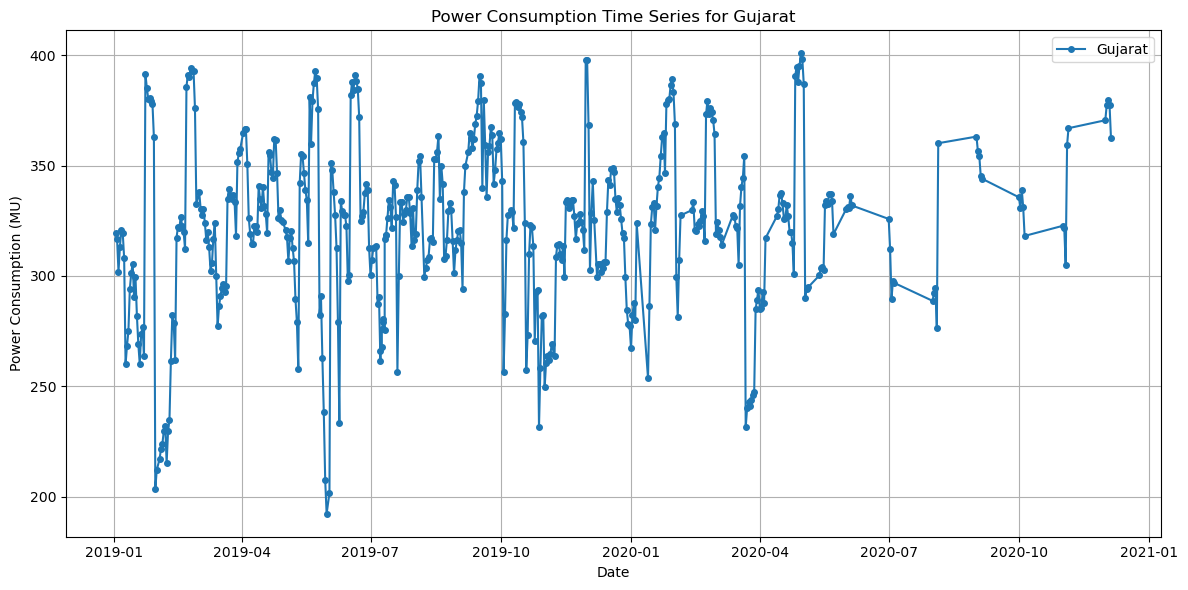

In [41]:
# Time-series Plot for a Particular State
power_data = pd.DataFrame(data)
power_data['Date'] = pd.to_datetime(power_data['Date'])  # Convert 'Date' to datetime format
power_data.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(power_data.index, power_data['Gujarat'], label='Gujarat', linestyle='-', marker='o', markersize=4)
plt.title('Power Consumption Time Series for Gujarat')
plt.xlabel('Date')
plt.ylabel('Power Consumption (MU)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
# Map Visual 
import pandas as pd
import plotly.express as px

df_long = pd.read_csv('C:/Users/91940/Documents/EE EDA/Datasets/long_data_.csv')
df_long.dropna(inplace=True)

fig = px.scatter_geo(df_long, 'latitude', 'longitude', color="Regions",
                     hover_name="States", size="Usage",
                     animation_frame="Date", scope='asia')
fig.update_geos(lataxis_range=[5, 35], lonaxis_range=[65, 100])
fig.show()
